-----
# Diabetes 130-US hospitals for years 1999-2008 Data Set

Original source of the Diabetes Dataset:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

-----
## Content



Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1) It is an inpatient encounter (a hospital admission).

(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3) The length of stay was at least 1 day and at most 14 days.

(4) Laboratory tests were performed during the encounter.

(5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

-----
## Understanding the Problem

#### Question: Predicting readmittance of patients


---------
## Loading Data 

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as math
from sklearn.pipeline import Pipeline

# Plotting imports and settings
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13, 8)

# Metrics and useful imports
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [207]:
import os
cwd = os.getcwd()

-------
## Data Exploration

In [208]:
df1 = pd.read_csv(cwd + '/dataset_diabetes/diabetic_data.csv')
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [209]:
# Replacing '?' with Nan

df1 = df1.replace('?',np.NaN).copy()

In [210]:
print(f' There are {len(df1)} entries in the dataset.')
# 71,518 unique patient numbers

print(f' There are {len(df1.patient_nbr.unique())} unique patients, the person addmitted the most was with patient_nbr:\
 {df1.patient_nbr.value_counts().head(1)}. ')

 There are 101766 entries in the dataset.
 There are 71518 unique patients, the person addmitted the most was with patient_nbr: 88785891    40
Name: patient_nbr, dtype: int64. 


In [211]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [212]:
# Looking for the percentage of missing data in columns

(df1.isna().sum() * 100 /len(df1)).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

-------

In [213]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [214]:
# set column types
num_attr = ['time_in_hospital',
            'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses',
            ]

cat_attr = [
                'encounter_id','patient_nbr', 'race', 'gender', 'age', 'weight',
               'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'payer_code', 'medical_specialty','diag_1','diag_2','diag_3','max_glu_serum',
            'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
            ]

target = ['readmitted']


In [215]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


-----
## Visualize Data

<AxesSubplot:title={'center':'Age Distribution of Patients Admitted'}, xlabel='age', ylabel='count'>

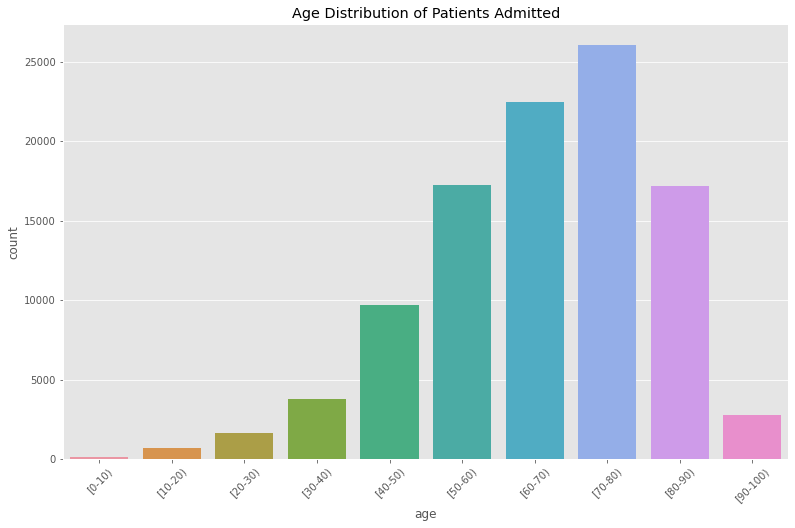

In [216]:
# plt.bar(
#         df1['age'].value_counts().index,
#         height=df1['age'].value_counts().values,
#         ),
plt.title('Age Distribution of Patients Admitted')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
sns.countplot(x='age',data=df1)

Text(0, 0.5, 'Frequency')

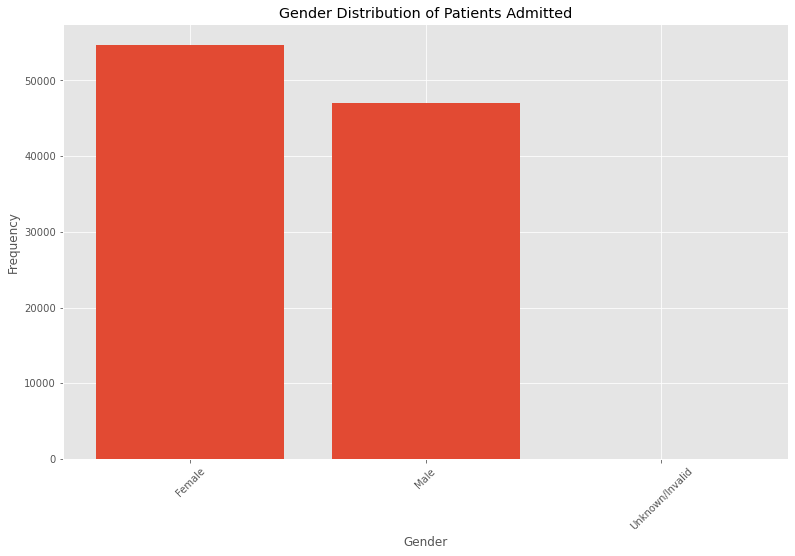

In [217]:
# Number of males and females in the dataset

plt.bar(
        df1['gender'].value_counts().index,
        height=df1['gender'].value_counts().values,
        ),
plt.xticks(rotation=45)

plt.title('Gender Distribution of Patients Admitted')
plt.xlabel('Gender')
plt.ylabel('Frequency')


#plt.savefig('Gender Dist.png')

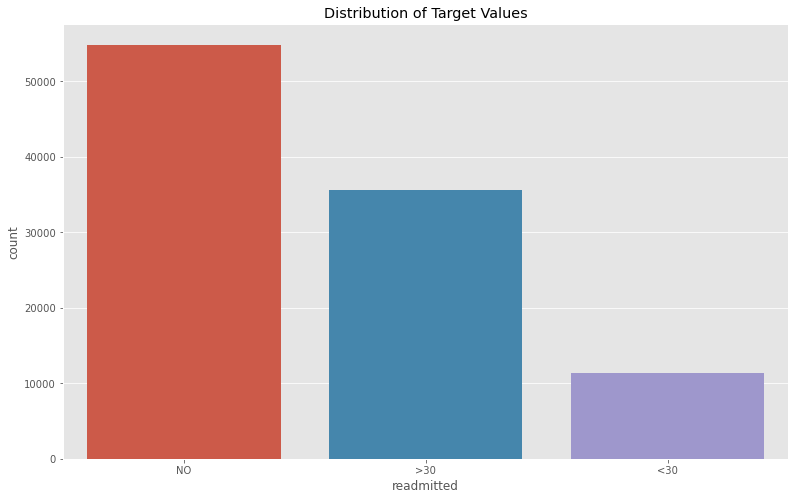


 Number of values
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

 Proportion of values
NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64


In [218]:
# Readmitted patients

sns.countplot(x = "readmitted", data = df1)
plt.title("Distribution of Target Values")
plt.show()

print("\n Number of values")
print(df1.readmitted.value_counts())
print("\n Proportion of values")
print(df1.readmitted.value_counts(normalize = True)*100)


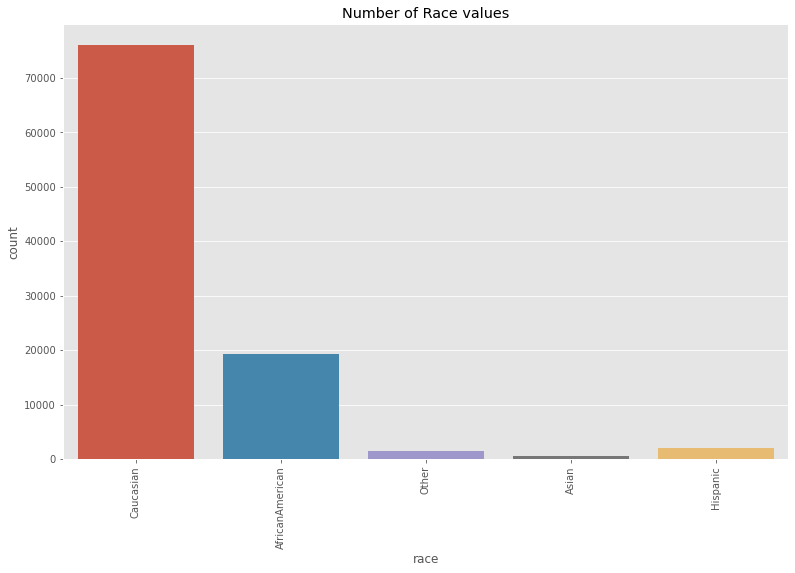

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [219]:
# Race of the patients

sns.countplot(x=df1.race, data = df1)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df1.race.value_counts(normalize = True)*100)


<!-- 
admission_type_id description
1	Emergency
2	Urgent
3	Elective
4	Newborn
5	Not Available
6	NULL
7	Trauma Center
8	Not Mapped -->

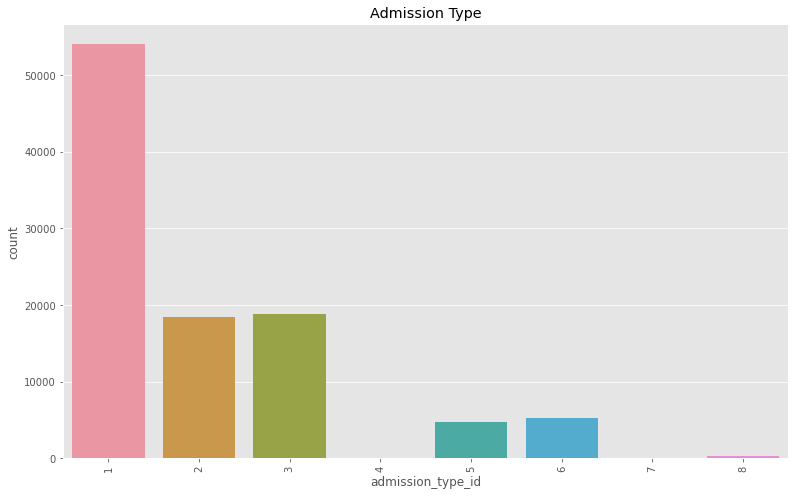

Proportion of Admission Type
1    53.053083
3    18.541556
2    18.159307
6     5.199182
5     4.701963
8     0.314447
7     0.020636
4     0.009826
Name: admission_type_id, dtype: float64


In [220]:
sns.countplot(x=df1.admission_type_id, data = df1)
plt.xticks(rotation=90)
plt.title("Admission Type")
plt.show()

print("Proportion of Admission Type")
print(df1.admission_type_id.value_counts(normalize = True)*100)


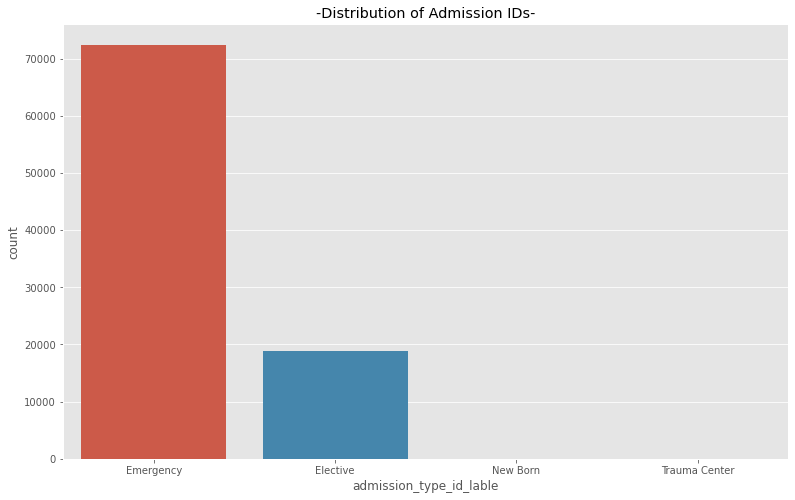

-Distribution of Admission Types-
Emergency        72470
Elective         18869
Trauma Center       21
New Born            10
Name: admission_type_id_lable, dtype: int64


In [221]:
lable = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

df1['admission_type_id_lable'] = df1.admission_type_id.replace(lable)

sns.countplot(x = "admission_type_id_lable", data = df1)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of Admission Types-")
print(df1.admission_type_id_lable.value_counts())
df1 = df1.drop(columns=['admission_type_id_lable'])


In [222]:
## Investigate Correlation in Numeric Variables

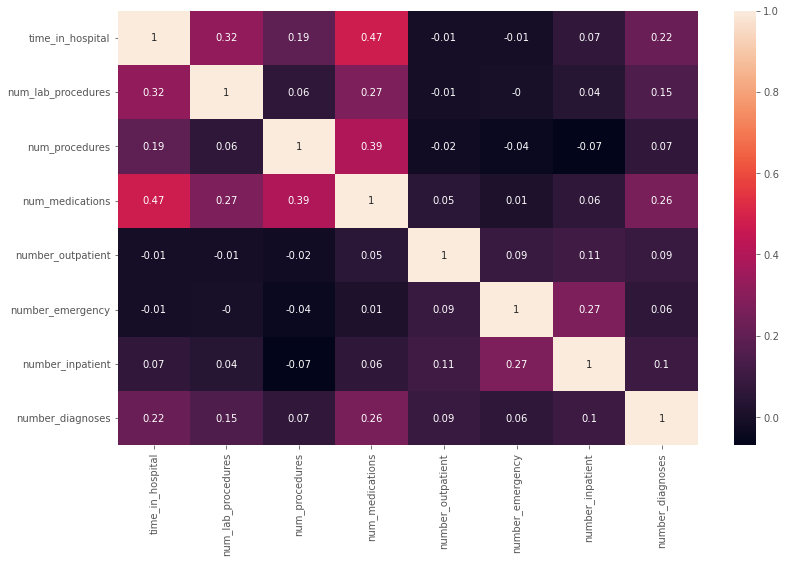

In [223]:
# Investigate Correlation between Variables
matrix = df1[num_attr].corr().round(2)

sns.heatmap(matrix, annot=True)
plt.show()


array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>]], dtype=object)

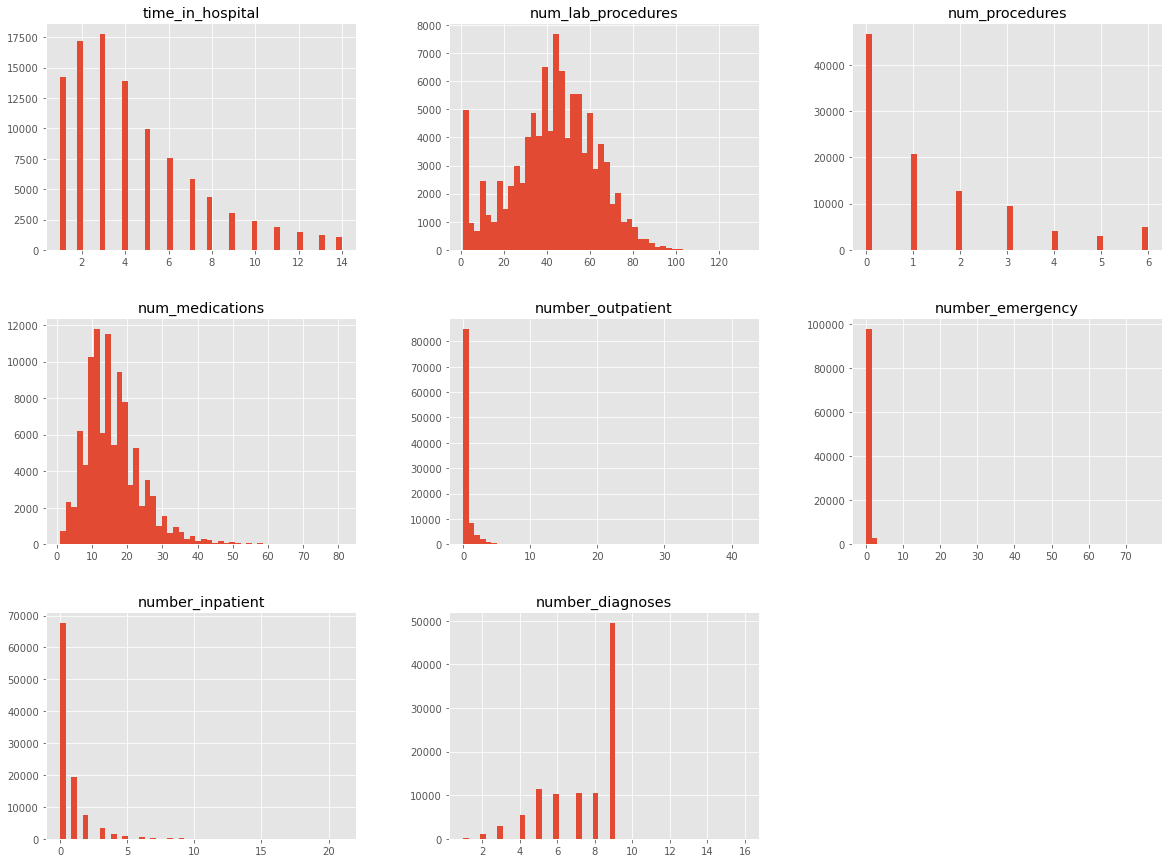

In [224]:
# create histograms of numeric attributes
df1[num_attr].hist(figsize=(20,15),bins=50)


------

## Scrub the data

1. Drop column: weight 
2. Drop rows with missing values for: race
3. Drop column: medical speciality of admitting physician
4. Drop column: payer code
5. Drop diag_1, fill in diag_2, diag_3 with nulls

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [226]:
(df1.isna().sum()/len(df1)*100).round(2)

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

In [227]:
# Removing unnecessary columns/columns with high number of null values

In [228]:
cats_to_drop = ['encounter_id','patient_nbr','weight','medical_specialty','payer_code']
df2 = df1.drop(columns=cats_to_drop)
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [229]:
# drop cat attributes no longer being used.
cat_attr = [x for x in cat_attr if x not in cats_to_drop]
cat_attr

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [230]:
df2.isna().sum()

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [231]:
df2.drop(df2[df2['gender'] =='Unknown/Invalid'].index, inplace=True)
df2['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

In [232]:
# drop race and diag_1 where rows are missing values
df3 = df2.dropna(axis=0,subset=['race','diag_1'])

In [233]:
df3.isna().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                       335
diag_3                      1348
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [234]:
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [235]:
# get top 5 diagnosis codes
df3['diag_1'].value_counts(ascending=False)*100/len(df3)

428    6.774703
414    6.439938
786    3.958863
410    3.536638
486    3.443145
         ...   
216    0.001005
V43    0.001005
838    0.001005
955    0.001005
V51    0.001005
Name: diag_1, Length: 714, dtype: float64

In [236]:
# Taking the top 5 diagnosis codes and filling all other codes with 'Other'
def diag_1_c(x):
    if x in ['428','414','786','410','486']:
        return x
    else:
        return 'Other'

In [237]:
diag_1_c('438')

'Other'

In [238]:
df3['diag_1_cat'] = df3['diag_1'].apply(diag_1_c).copy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
df3['diag_1'].value_counts(ascending=False)

428    6739
414    6406
786    3938
410    3518
486    3425
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: diag_1, Length: 714, dtype: int64

In [240]:
df3['diag_1_cat'].value_counts(ascending=False)

Other    75447
428       6739
414       6406
786       3938
410       3518
486       3425
Name: diag_1_cat, dtype: int64

In [241]:
def diag_2_3_c(x):
    if x in ['428','414','786','410','486']:
        return x
    try:
        if math.isnan(float(x)):
            return 'Other'
    except ValueError:
        return 'Other'
    return 'Other'

In [242]:
diag_2_3_c('V45')

'Other'

In [243]:
df3['diag_2_cat'] = df3['diag_2'].apply(diag_2_3_c).copy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
df3['diag_2_cat'].value_counts(ascending=False)

Other    87858
428       6522
414       2575
486       1349
786        634
410        535
Name: diag_2_cat, dtype: int64

In [245]:
df3['diag_3_cat'] = df3['diag_3'].apply(diag_2_3_c).copy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
df3['diag_3_cat'].value_counts(ascending=False)

Other    90078
428       4495
414       3568
786        573
486        552
410        207
Name: diag_3_cat, dtype: int64

In [247]:

df3 = df3.drop(columns=['diag_1','diag_2','diag_3'])

In [248]:
# update available cat_attrs
cat_attr += ['diag_1_cat', 'diag_2_cat', 'diag_3_cat']

# remove dropped cat_attr
cat_attr = [x for x in cat_attr if x not in ['diag_1','diag_2','diag_3']]

cat_attr

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'diag_1_cat',
 'diag_2_cat',
 'diag_3_cat']

In [249]:
# To be used in later data cleaning
df4 = df3.copy()

### Created a onehotcoder for categorical variables

In [174]:
# convert integer variables to numbers
df3[
    ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',  'max_glu_serum']
] = df3[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',  'max_glu_serum']].astype(str)

In [175]:
one_hot = pd.get_dummies(df3[cat_attr])


In [176]:
one_hot.columns[:50]

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'age_[0-10)',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5',
       'admission_type_id_6', 'admission_type_id_7', 'admission_type_id_8',
       'discharge_disposition_id_1', 'discharge_disposition_id_10',
       'discharge_disposition_id_11', 'discharge_disposition_id_12',
       'discharge_disposition_id_13', 'discharge_disposition_id_14',
       'discharge_disposition_id_15', 'discharge_disposition_id_16',
       'discharge_disposition_id_17', 'discharge_disposition_id_18',
       'discharge_disposition_id_19', 'discharge_disposition_id_2',
       'discharge_disposition_id_20', 'discharge_disposition_id_22',
       'discharge

In [177]:
df3 = df3.drop(columns=cat_attr)
df3.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [178]:
df3 = df3.join(one_hot)
df3.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted',
       'race_AfricanAmerican',
       ...
       'diag_2_cat_428', 'diag_2_cat_486', 'diag_2_cat_786',
       'diag_2_cat_Other', 'diag_3_cat_410', 'diag_3_cat_414',
       'diag_3_cat_428', 'diag_3_cat_486', 'diag_3_cat_786',
       'diag_3_cat_Other'],
      dtype='object', length=177)

-----
## Spliting the data into test and training sets

In [179]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df3, test_size=0.3, random_state=42)

In [180]:
target = 'readmitted'
features = list(train_set.columns)
features = [f for f in features if f != target]

In [181]:
# Train set
X_tr = train_set[features]
y_tr = train_set[[target]]

# Test set
X_te = test_set[features]
y_te = test_set[[target]]

In [182]:
train_set.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,...,diag_2_cat_428,diag_2_cat_486,diag_2_cat_786,diag_2_cat_Other,diag_3_cat_410,diag_3_cat_414,diag_3_cat_428,diag_3_cat_486,diag_3_cat_786,diag_3_cat_Other
96087,1,53,1,11,2,1,3,6,>30,0,...,0,0,0,1,0,0,0,0,0,1
58011,4,51,1,13,0,0,0,9,NO,0,...,0,0,0,1,0,0,0,0,0,1
2079,3,43,0,3,0,0,0,5,>30,1,...,0,0,0,1,0,0,0,0,0,1
91024,3,2,0,10,0,0,0,9,NO,0,...,0,0,0,1,0,0,0,0,0,1
96877,2,44,0,34,0,0,0,9,NO,0,...,0,0,0,1,0,0,0,0,0,1


-----
### Scaling numeric variables

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

### Adjusting Targets to Binary

In [184]:
y_train_no = (y_tr != 'NO').values.ravel()
y_test_no = (y_te != 'NO').values.ravel()

------------
## Model

#### Binary Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score




In [186]:
## consider removing
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=4, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right", fontsize=16)

In [187]:
# fit the SGD
sgd_clf = SGDClassifier(max_iter=5, tol=-np.inf, random_state=42)
sgd_clf.fit(X_tr, y_train_no)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [188]:
# predict using training data
y_train_pred = sgd_clf.predict(X_tr)

In [189]:

confusion_matrix(y_train_no,y_train_pred)

array([[25145, 12094],
       [17226, 15166]])

In [190]:
# model is not very accurate
cross_val_score(sgd_clf, X_tr, y_train_no, cv=3, scoring="accuracy") 

array([0.5650769 , 0.57794054, 0.57794054])

## SGD - Tuning the Model

In [191]:
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000],
              }]
grid_search_sgd = GridSearchCV(estimator=sgd_clf,param_grid=param_grid, cv=3,scoring = 'roc_auc',
)
grid_search_sgd.fit(X_tr, y_train_no)

GridSearchCV(cv=3,
             estimator=SGDClassifier(max_iter=5, random_state=42, tol=-inf),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             scoring='roc_auc')

In [192]:
# can improve model if using an alpha of 0.1
print(grid_search_sgd.best_params_)
print(grid_search_sgd.best_score_)

{'alpha': 0.1}
0.6802398636035029


In [193]:
# retrying model using above parameters and test data
sgd_clf = SGDClassifier(max_iter=5, tol=-np.inf, random_state=42,alpha=0.1)
sgd_clf.fit(X_tr, y_train_no)

y_hat = sgd_clf.predict(X_te)
print(accuracy_score(y_hat, y_test_no), f1_score(y_hat, y_test_no, average='macro'), precision_score(y_hat, y_test_no), recall_score(y_hat, y_test_no))

0.6256283090945647 0.5859690290984938 0.34240708478513354 0.6906295754026355


In [194]:
# PCA results got worse.

In [195]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)

# Your code here
X_train_pca = pca.fit_transform(X_tr)
X_test_pca = pca.transform(X_te)
X_train_pca.shape

(69631, 129)

In [196]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# from grid search above
sgd_clf = SGDClassifier(max_iter=5, tol=-np.inf, random_state=42,alpha=0.1)
sgd_clf.fit(X_train_pca, y_train_no)

y_hat = sgd_clf.predict(X_test_pca)
print(accuracy_score(y_hat, y_test_no), f1_score(y_hat, y_test_no, average='macro'),precision_score(y_hat, y_test_no), recall_score(y_hat, y_test_no))

0.6249581127270291 0.5859091062085195 0.344294425087108 0.687192118226601


## Random Forest

In [197]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=15)


In [198]:
cross_val_score(forest_clf, X_tr, y_train_no, cv=3, scoring="accuracy")

array([0.60402395, 0.60607497, 0.60659199])

In [199]:
param_grid = [{'n_estimators': [75,100,150,200],
              }]
grid_search_forest = GridSearchCV(estimator=forest_clf,param_grid=param_grid, cv=3,scoring = 'roc_auc',
)
grid_search_forest.fit(X_tr, y_train_no)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=15, random_state=42),
             param_grid=[{'n_estimators': [75, 100, 150, 200]}],
             scoring='roc_auc')

In [200]:
# can improve model if using n_estimators:

print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)

{'n_estimators': 200}
0.6789570742338612


In [201]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=200)
forest_clf.fit(X_tr, y_train_no)

RandomForestClassifier(n_estimators=200, random_state=42)

In [202]:
y_hat = forest_clf.predict(X_te)

In [203]:
print(accuracy_score(y_hat, y_test_no), f1_score(y_hat, y_test_no, average='macro'), precision_score(y_hat, y_test_no), recall_score(y_hat, y_test_no))



0.6342068225990215 0.6279826452664232 0.5468205574912892 0.6171554972964116


## Refining Data Cleaning

In [307]:
df4 = df1.copy()

#remove duplicate patient encounters and keep only first
df4 = df4.sort_values(by=['patient_nbr','encounter_id'],ascending=True)
df4 = df4.drop_duplicates(subset='patient_nbr',keep='first')
                          
# drop columns                       
cats_to_drop = ['encounter_id','patient_nbr','weight','medical_specialty','payer_code']
df4 = df4.drop(columns=cats_to_drop)

In [308]:
df4.drop(df4[df4['gender'] =='Unknown/Invalid'].index, inplace=True)
df4 = df4.dropna(axis=0,subset=['race','diag_1'])

In [309]:
df4['diag_1_cat'] = df4['diag_1'].apply(diag_1_c).copy()
df4['diag_2_cat'] = df4['diag_2'].apply(diag_2_3_c).copy()
df4['diag_3_cat'] = df4['diag_3'].apply(diag_2_3_c).copy()

df4 = df4.drop(columns=['diag_1','diag_2','diag_3'])

In [310]:
# put into numeric
age_dict = {'[70-80)':75,
            '[60-70)':65, 
            '[50-60)':55, 
            '[80-90)':85, 
            '[40-50)':45, 
            '[30-40)':35,
            '[90-100)':95, 
            '[20-30)':25, 
            '[10-20)':15, 
            '[0-10)':5}


df4['age'] = df4['age'].apply(lambda x: age_dict[x])

In [311]:
# A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. 
# A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. 
# A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

glu_dict = {'None':0, 
            'Norm':70, #upper bound is 140
            '>200':200, 
            '>300':300}

df4['max_glu_serum'] = df4['max_glu_serum'].apply(lambda x: glu_dict[x])
df4['max_glu_serum'].value_counts()

0      66153
70      1707
200      952
300      747
Name: max_glu_serum, dtype: int64

In [312]:
# A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, 
# and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, 
# the higher your A1C, the greater your risk is for developing type 2 diabetes.

a1c_dict = {'None':0,
            '>8':8,
            'Norm':2.85,
            '>7':7
            }
df4['A1Cresult'] = df4['A1Cresult'].apply(lambda x: a1c_dict[x])
df4['A1Cresult'].value_counts()

0.00    56959
8.00     6065
2.85     3716
7.00     2819
Name: A1Cresult, dtype: int64

In [313]:
med_list = ['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',]

med_dict = {'No':'No Change',
            'Steady':'No Change',
            'Up':'Change',
            'Down':'Change'
           }
for column in med_list:
    df4[column] = df4[column].apply(lambda x: med_dict[x])
df4[med_list].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
4267,No Change,No Change,No Change,No Change,No Change,No Change,No Change,Change,No Change,No Change,...,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change
5827,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,...,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change
67608,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,...,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change
17494,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,...,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change
2270,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,...,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change,No Change


In [314]:
# remap admission
admission_type_id_desc = {
1:'Emergency',
2:'Emergency', #Formerly Urgent
3:'Elective',
4:'Newborn',
5:'Not Available',
6:'Not Available', # formerly NULL
7:'Emergency', # Formerly Trauma Center
8:'Not Available'} # formerly Not Mapped
df4.admission_type_id.value_counts()

1    35588
3    13589
2    12421
6     4522
5     3122
8      288
7       20
4        9
Name: admission_type_id, dtype: int64

In [315]:
dis_dict = {1:'Discharged',
2:'Discharged',
3:'Discharged',
4:'Discharged',
5:'Discharged',
6:'Discharged',
7:'Discharged',
8:'Discharged',
9:'Admitted',
10:'Discharged',
11:'Expired',
12:'Outpatient',
13:'Outpatient',
14:'Outpatient',
15:'Transfer',
16:'Transfer',
17:'Transfer',
18:'Unknown',
19:'Expired',
20:'Expired',
21:'Expired',
22:'Transfer',
23:'Transfer',
24:'Transfer',
25:'Unknown',
26:'Unknown',
30:'Transfer',
27:'Transfer',
28:'Transfer',
29:'Transfer'}

df4['discharge_disposition_id'] = df4['discharge_disposition_id'].apply(lambda x: dis_dict[x])
df4['discharge_disposition_id'].value_counts()

Discharged    62991
Unknown        3219
Transfer       1824
Expired        1057
Outpatient      459
Admitted          9
Name: discharge_disposition_id, dtype: int64

In [316]:
admis_source_desc = {
    1:'Referral',
2:'Referral',
3:'Referral',
4:'Transfer',
5:'Transfer',
6:'Transfer',
7:'Emergency',
8:'Emergency',
9:'Unknown',
10:'Transfer',
11:'Newborn',
12:'Newborn',
13:'Newborn',
14:'Newborn',
15:'Unknown',
17:'Unknown',
18:'Transfer',
19:'Readmit',
20:'Unknown',
21:'Unknown',
22:'Transfer',
23:'Newborn',
24:'Newborn',
25:'Transfer',
26:'Transfer'}
              

df4['admission_source_id'] = df4['admission_source_id'].apply(lambda x: dis_dict[x])
df4['admission_source_id'].value_counts()

Discharged    64484
Transfer       4876
Expired         155
Admitted         39
Outpatient        3
Unknown           2
Name: admission_source_id, dtype: int64

In [317]:
encoded = [
 'max_glu_serum','A1Cresult','age']

cat_attr2 = [x for x in cat_attr if x not in encoded]
num_attr2 = num_attr + encoded

In [318]:
#### One Hot Encoding
cat_attr2

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'diag_1_cat',
 'diag_2_cat',
 'diag_3_cat']

In [319]:
one_hot = pd.get_dummies(df4[cat_attr2])

In [320]:
df4 = df4.drop(columns=cat_attr2)

In [321]:
df4 = df4.join(one_hot)
df4.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,diag_2_cat_428,diag_2_cat_486,diag_2_cat_786,diag_2_cat_Other,diag_3_cat_410,diag_3_cat_414,diag_3_cat_428,diag_3_cat_486,diag_3_cat_786,diag_3_cat_Other
4267,55,8,77,6,33,0,0,0,8,0,...,0,0,0,1,0,0,0,0,0,1
5827,55,2,49,1,11,0,0,0,3,0,...,0,0,0,1,0,0,0,0,0,1
67608,85,4,68,2,23,0,0,0,9,0,...,0,0,0,1,0,0,0,0,0,1
17494,85,3,46,0,20,0,0,0,9,0,...,0,0,0,1,0,0,0,0,0,1
2270,35,5,49,0,5,0,0,0,3,0,...,0,0,0,1,0,0,0,0,0,1


In [322]:
#### Train Test Split

In [323]:
train_set, test_set = train_test_split(df4, test_size=0.3, random_state=42)

In [324]:
target = 'readmitted'
features = list(train_set.columns)
features = [f for f in features if f != target]

In [325]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [326]:
### SGD

In [327]:

y_train_no = (y_tr != 'NO').values.ravel()
y_test_no = (y_te != 'NO').values.ravel()

In [328]:
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000],
              }]
grid_search_sgd = GridSearchCV(estimator=sgd_clf,param_grid=param_grid, cv=3,scoring = 'roc_auc',
)
grid_search_sgd.fit(X_tr, y_train_no)

GridSearchCV(cv=3,
             estimator=SGDClassifier(alpha=0.1, max_iter=5, random_state=42,
                                     tol=-inf),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             scoring='roc_auc')

In [329]:
# can improve model if using an alpha of 0.1
print(grid_search_sgd.best_params_)
print(grid_search_sgd.best_score_)

{'alpha': 0.1}
0.6802398636035029


In [330]:
# from grid search above
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
sgd_clf = SGDClassifier(max_iter=5, tol=-np.inf, random_state=42,alpha=0.1)
sgd_clf.fit(X_tr, y_train_no)

y_hat = sgd_clf.predict(X_te)
print(accuracy_score(y_hat, y_test_no), f1_score(y_hat, y_test_no, average='macro'), precision_score(y_hat, y_test_no), recall_score(y_hat, y_test_no))

0.6256283090945647 0.5859690290984938 0.34240708478513354 0.6906295754026355


In [331]:
### Random Forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

param_grid = [{'n_estimators': [75,100,150,200],
               'max_depth':[5,10,15,25],
              }]
grid_search_forest = GridSearchCV(estimator=forest_clf,param_grid=param_grid, cv=3,scoring = 'roc_auc',
)
grid_search_forest.fit(X_tr, y_train_no)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 10, 15, 25],
                          'n_estimators': [75, 100, 150, 200]}],
             scoring='roc_auc')

In [333]:
print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)

{'max_depth': 15, 'n_estimators': 200}
0.6924237229984703


In [334]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=200,max_depth=15)
forest_clf.fit(X_tr, y_train_no)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [335]:
y_hat = forest_clf.predict(X_te)

In [336]:
print(f'''
    accuracy: {accuracy_score(y_hat, y_test_no)} f1: {f1_score(y_hat, y_test_no, average='macro')}
    precision: {precision_score(y_hat, y_test_no)} recall: {recall_score(y_hat, y_test_no)}''')




    accuracy: 0.6424167281013337 f1: 0.6318532374207478
    precision: 0.5123403019744484 recall: 0.6409953682680956


In [337]:
imp_df = pd.DataFrame(item for item in zip(features,forest_clf.feature_importances_))
imp_df = imp_df.set_index(0)
imp_df[1].sort_values(ascending=False)[:50] *100

0
number_emergency                       17.209205
num_procedures                          5.556241
nateglinide_Change                      5.447477
time_in_hospital                        5.069372
number_inpatient                        4.930508
number_outpatient                       4.791617
num_medications                         4.239735
age                                     3.622672
num_lab_procedures                      2.544729
diag_1_cat_428                          1.608162
troglitazone_No Change                  1.136982
repaglinide_Change                      0.980360
discharge_disposition_id_Outpatient     0.965320
admission_source_id_Expired             0.902223
diag_1_cat_414                          0.825891
A1Cresult                               0.822398
race_Asian                              0.813856
discharge_disposition_id_Transfer       0.808373
race_Caucasian                          0.798489
admission_source_id_Admitted            0.772575
diag_2_cat_Other  